In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("INDIVIDUAL_T2_GBA.csv",dtype={"Numero de Vivienda":str})
df.head()

C:\Users\manci\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Nro_Vivienda,Nro_Hogar,Componente,Ano,Trimestre,Region,Mas500,Aglomerado,RelHogar,...,CondActividad,CatOcupacion,CatInactividad,ServDomestico,IngTI,DIngTIG,DIngTIL,IngTF,DIngTFG,DIngTFL
0,0,125111,1,1,2004,2,1,S,32,1,...,1,3,0,2.0,0.0,0,0,1000,7,5
1,1,125111,1,2,2004,2,1,S,32,2,...,1,3,0,2.0,1000.0,9,7,1000,7,5
2,2,125458,1,1,2004,2,1,S,32,1,...,1,3,0,2.0,1000.0,9,7,1600,9,7
3,3,125458,1,2,2004,2,1,S,32,2,...,1,3,0,2.0,600.0,7,5,1600,9,7
4,4,125458,1,3,2004,2,1,S,32,3,...,4,0,3,0.0,0.0,0,0,1600,9,7


In [ ]:
df.info()

In [4]:
df_2017=df[df.Ano == 2017]
df_2017.head()

,Unnamed: 0,Nro_Vivienda,Nro_Hogar,Componente,Ano,Trimestre,Region,Mas500,Aglomerado,RelHogar,...,CondActividad,CatOcupacion,CatInactividad,ServDomestico,IngTI,DIngTIG,DIngTIL,IngTF,DIngTFG,DIngTFL
119258,34671,TQRMNORTPHLNLTCDEIIAD00593003,1,1,2017,2,1,S,32,1,...,1,2,0,2.0,76000.0,10,10,76000,10,10
119259,34672,TQRMNOQRVHMMMSCDEIIAD00593004,1,1,2017,2,1,S,32,1,...,3,0,1,NaN,6500.0,4,2,6500,1,1
119260,34673,TQRMNOQRVHMMMSCDEIIAD00593004,1,2,2017,2,1,S,32,5,...,3,0,3,NaN,0.0,0,0,6500,1,1
119261,34674,TQRMNOQRVHMMMSCDEIIAD00593004,1,3,2017,2,1,S,32,5,...,3,0,3,NaN,0.0,0,0,6500,1,1
119262,34675,TQRMNOQPXHLLMRCDEIIAD00593005,1,1,2017,2,1,S,32,1,...,1,2,0,2.0,-9.0,12,12,0,-1,-1


In [48]:
df_2017.drop("Ano",axis=1,inplace=True)

C:\Users\manci\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_2017.isnull().sum() #me dice cuantos nulls hay en cada columna, si no le pongo el sum() me da un df booleano con true o false depende el caso

Unnamed: 0           0
Nro_Vivienda         0
Nro_Hogar            0
Componente           0
Trimestre            0
Region               0
Mas500               0
Aglomerado           0
RelHogar             0
Sexo                 0
Edad                 0
NivelEd              0
CondActividad        0
CatOcupacion         0
CatInactividad       0
ServDomestico     6463
IngTI               30
DIngTIG              0
DIngTIL              0
IngTF                0
DIngTFG              0
DIngTFL              0
dtype: int64

In [59]:
df_2017.IngTI.fillna(value=0,inplace=True)

C:\Users\manci\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [ ]:
df_2017[df_2017.IngTI.isnull()]

In [ ]:
while(df_2017[df_2017.IngTI < 0].size > 0):
    df_2017[df_2017.IngTI < 0].IngTI.values[0]=0
df_2017[df_2017.IngTI < 0]

Text(0.5,1,'Ganancia Total Individual(promedio), Mujeres vs Hombres')

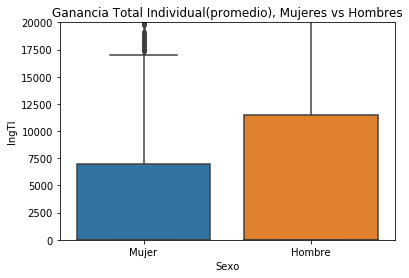

In [83]:
sns.boxplot(data=df_2017,x="Sexo",y="IngTI",order=["Mujer","Hombre"])
plt.ylim(0,20000)
plt.title("Ganancia Total Individual(mediana), Mujeres vs Hombres")

In [3]:
sns.violinplot(data=df_2017,x="Sexo",y="IngTI",order=["Mujer","Hombre"])
plt.ylim(-10000,50000)
plt.title("Ganancia Total Individual(mediana), Mujeres vs Hombres")

NameError: name 'df_2017' is not defined